In [105]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import itertools
import rasterio
from matplotlib import pyplot as plt
import geopandas as gpd
from rasterstats import zonal_stats
from tqdm import tqdm
import xarray as xr
from rasterstats import zonal_stats


In [106]:
PRECIP_EA = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/EA/'
PRECIP_MONTHLY = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/Monthly/'
PRECIP_SEASONAL = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/Seasonal/'
PRECIP_SEASONAL_CROP_RAIN = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/Seasonal_Crop_Rain/'

In [107]:
crop_rain_mask = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/ESACCI_2016/crop_rain_mask/EA_ESACCI_LC_2016_005_10.tif'

In [108]:
def read_file(file):
    with rasterio.open(file) as src:
        return(src.read())

In [109]:
def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [110]:
def monthly_means(in_dir, out_dir, var):
      
    files=np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(files).str.contains('.tif')
    files = files[tifs]
    
    grouped = grouper(3, files)
    
    for group in grouped:
        month = group[0][24:31]
        print(month)
        
        
        file1 = read_file(in_dir+group[0])
        
        file2 = read_file(in_dir+group[1])
        
        file3 = read_file(in_dir+group[2])
        
        monthly_mean = np.mean([file1, file2, file3], axis=0)
       
      #  plt.imshow(monthly_mean[0])
        
        
        with rasterio.open(in_dir + group[0]) as src:
            meta = src.meta

#         meta.update(dtype=rasterio.float64)
        

        # Write output file
        with rasterio.open(out_dir + var + '_' + month + '.tif', 'w', **meta) as dst:
            dst.write(monthly_mean)
                  

In [ ]:
monthly_means(PRECIP_EA, PRECIP_MONTHLY, 'precip')

In [112]:
def seasonal_mean(in_dir, out_dir, var, year, months, month_code, orig_dir):
    files=np.array(sorted(os.listdir(in_dir)))
    yeartifs =  pd.Series(files).str.contains(year)
    yearfiles = files[yeartifs]
    monthtifs = pd.Series(yearfiles).str.contains(months)
    monthfiles = yearfiles[monthtifs]
    #print(monthfiles)
    
    ofiles = np.array(sorted(os.listdir(orig_dir)))
    origtifs = pd.Series(ofiles).str.contains('.tif')
    origfiles = ofiles[origtifs]
    
    
    file1 = read_file(in_dir+monthfiles[0])
    #file1rs = (file1-100)/100
    file2 = read_file(in_dir+monthfiles[1])
    #file2rs = (file2-100)/100
    file3 = read_file(in_dir+monthfiles[2])
    #file3rs = (file3-100)/100
    
    
    seasonal_mean = np.mean([file1, file2, file3], axis=0)
   #seasonal_mean[seasonal_mean == 1.53] = np.nan

    #print(seasonal_mean)
    
    with rasterio.open(orig_dir + origfiles[0]) as src:
        meta = src.meta
        
        meta.update(dtype=rasterio.float32)
        

         # Write output file
    with rasterio.open(out_dir + var + '_' + month_code + '_' + year + '.tif', 'w', **meta) as dst:
        
        
        dst.write(seasonal_mean)
                  
    
   

In [113]:
ond_2003 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2003', '10|11|12', 'ond', PRECIP_EA)
ond_2004 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2004', '10|11|12', 'ond', PRECIP_EA)
ond_2005 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2005', '10|11|12', 'ond', PRECIP_EA)
ond_2006 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2006', '10|11|12', 'ond', PRECIP_EA)
ond_2007 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2007', '10|11|12', 'ond', PRECIP_EA)
ond_2008 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2008', '10|11|12', 'ond', PRECIP_EA)
ond_2009 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2009', '10|11|12', 'ond', PRECIP_EA)
ond_2010 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2010', '10|11|12', 'ond', PRECIP_EA)
ond_2011 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2011', '10|11|12', 'ond', PRECIP_EA)
ond_2012 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2012', '10|11|12', 'ond', PRECIP_EA)
ond_2013 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2013', '10|11|12', 'ond', PRECIP_EA)
ond_2014 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2014', '10|11|12', 'ond', PRECIP_EA)
ond_2015 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2015', '10|11|12', 'ond', PRECIP_EA)
ond_2016 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2016', '10|11|12', 'ond', PRECIP_EA)
ond_2017 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2017', '10|11|12', 'ond', PRECIP_EA)
ond_2018 = seasonal_mean(PRECIP_MONTHLY, PRECIP_SEASONAL, 'ndvi','2018', '10|11|12', 'ond', PRECIP_EA)


In [116]:
def rastercalc_lcmask(lc_mask, seasonal_dir, out_dir, lc):
    
    lc2016_mask = rasterio.open(lc_mask)
    seasonal_means = np.array(sorted(os.listdir(seasonal_dir)))
    tifs = pd.Series(seasonal_means).str.contains('.tif')
    files = seasonal_means[tifs]
    
    mean_smean_list = []
    
    for filename in files:
            ea_seasonal_mean = rasterio.open(seasonal_dir + filename)
            meta = ea_seasonal_mean.meta
            smean_lcmask = ea_seasonal_mean.read(1)*lc2016_mask.read(1)
            mean_smean = np.nanmean(smean_lcmask)
            mean_smean_list.append(mean_smean)
            
    return mean_smean_list
#             with rasterio.open(out_dir + lc + filename, 'w', **meta) as dst: #change name depending on variable
#                     dst.write(smean_lcmask, 1)
#                     print(filename)

In [117]:
mean_smean = rastercalc_lcmask(crop_rain_mask, PRECIP_SEASONAL, PRECIP_SEASONAL_CROP_RAIN, 'cr_')

In [118]:
len(mean_smean)

16

In [122]:
data = {'Year': list(range(2003, 2019)), 'AvgRainfall': mean_smean}

In [123]:
pd.DataFrame(data, columns=['Year', 'AvgRainfall'])

,Year,AvgRainfall
0,2003,16.761034
1,2004,20.550884
2,2005,12.935894
3,2006,28.566845
4,2007,16.040859
5,2008,17.168598
6,2009,21.235394
7,2010,19.677217
8,2011,13.745956
9,2012,10.662415


In [132]:
def simplex_mean(in_dir):
    
    
    simplex_rasters = np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(simplex_rasters).str.contains('.tif')
    files = simplex_rasters[tifs]
    
    mean_simplex = []
    
    for filename in files:
            simplex_raster = rasterio.open(in_dir + filename)
            read_raster = simplex_raster.read(1)
            mean_raster = np.nanmean(read_raster)
            mean_simplex.append(mean_raster)
            
    return mean_simplex


In [140]:
mean_simplex_out_cr_ond = simplex_mean('/home/rgreen/DroughtEDM/Data/Seasonal_Simplex/ndvi_ea_simplex_ond_cr_years/')
mean_simplex_out_cr_mam = simplex_mean('/home/rgreen/DroughtEDM/Data/Seasonal_Simplex/ndvi_ea_simplex_mam_cr_years/')

In [141]:
data_cr_ond = {'Year': list(range(2003, 2019)), 'AvgRainfall': mean_smean, 'AvgSimplex': mean_simplex_out_cr_ond}
data_cr_mam = {'Year': list(range(2003, 2019)), 'AvgRainfall': mean_smean, 'AvgSimplex': mean_simplex_out_cr_mam}

In [144]:
prediction_skill_rainfall_cr_ond = pd.DataFrame(data_cr_ond, columns=['Year', 'AvgRainfall', 'AvgSimplex'])
prediction_skill_rainfall_cr_mam = pd.DataFrame(data_cr_mam, columns=['Year', 'AvgRainfall', 'AvgSimplex'])

In [145]:
prediction_skill_rainfall_cr_ond

,Year,AvgRainfall,AvgSimplex
0,2003,16.761034,0.557472
1,2004,20.550884,0.520464
2,2005,12.935894,0.493104
3,2006,28.566845,0.539310
4,2007,16.040859,0.572247
5,2008,17.168598,0.487174
6,2009,21.235394,0.472723
7,2010,19.677217,0.543306
8,2011,13.745956,0.605735
9,2012,10.662415,0.601914


Text(0, 0.5, 'Avg Season Prediction Skill')

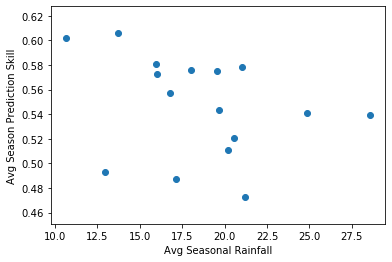

In [138]:
fig = plt.figure()
plt.scatter(prediction_skill_rainfall_cr_ond.AvgRainfall, prediction_skill_rainfall_cr_ond.AvgSimplex)
plt.xlabel('Avg Seasonal Rainfall')
plt.ylabel('Avg Season Prediction Skill')

Text(0, 0.5, 'Avg Season Prediction Skill')

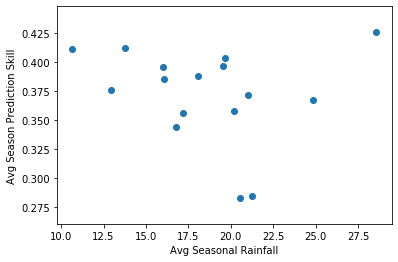

In [146]:
fig = plt.figure()
plt.scatter(prediction_skill_rainfall_cr_mam.AvgRainfall, prediction_skill_rainfall_cr_mam.AvgSimplex)
plt.xlabel('Avg Seasonal Rainfall')
plt.ylabel('Avg Season Prediction Skill')